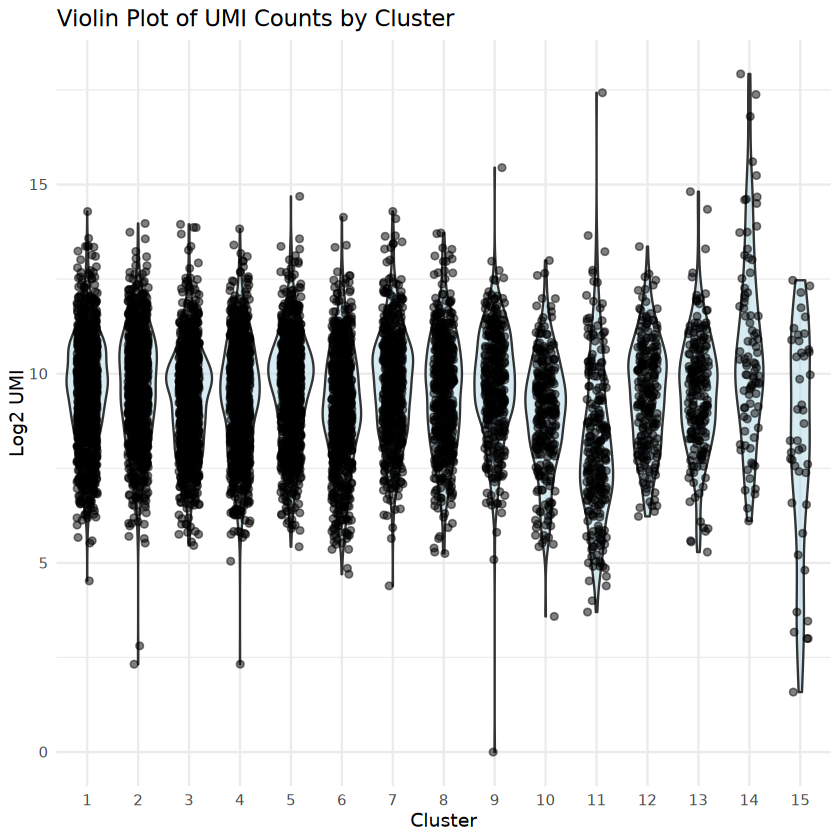

In [1]:
library(ggplot2)

# 读取 TSV 文件
data <- read.table("/SGRNJ06/randd/USER/zhouyiqi/work/analysis/citeseq/change_color_scale/cluster_UMI.tsv", header=TRUE, sep="\t")

# 画小提琴图
ggplot(data, aes(x = factor(cluster), y = A0951_log2_UMI)) +
  geom_violin(fill = "lightblue", alpha = 0.5) +
  geom_jitter(width = 0.2, alpha = 0.5, color = "black") + # 添加散点
  labs(x = "Cluster", y = "Log2 UMI", title = "Violin Plot of UMI Counts by Cluster") +
  theme_minimal()


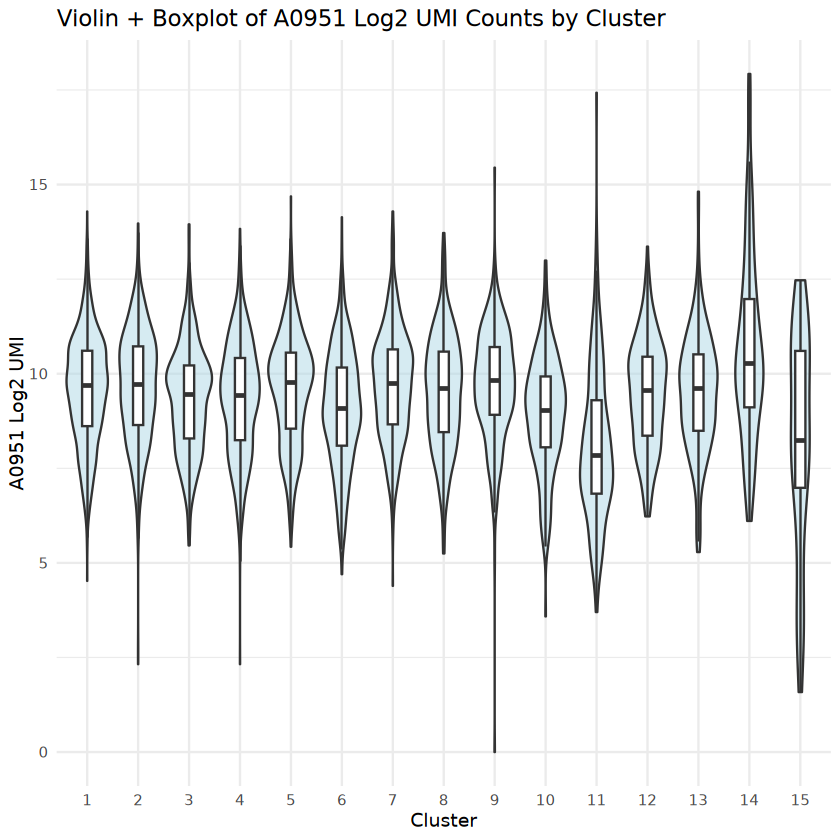

In [4]:
ggplot(data, aes(x = factor(cluster), y = A0951_log2_UMI)) +
  geom_violin(fill = "lightblue", alpha = 0.5) +  # 小提琴图
  geom_boxplot(width = 0.2, outlier.shape = NA) +  # 添加箱线图，不显示异常值
  labs(x = "Cluster", y = "A0951 Log2 UMI", title = "Violin + Boxplot of A0951 Log2 UMI Counts by Cluster") +
  theme_minimal()

In [5]:
setwd('/SGRNJ06/randd/USER/zhouyiqi/work/analysis/citeseq/change_color_scale')
ggsave("violin_boxplot.png", width = 6, height = 4, dpi = 300)

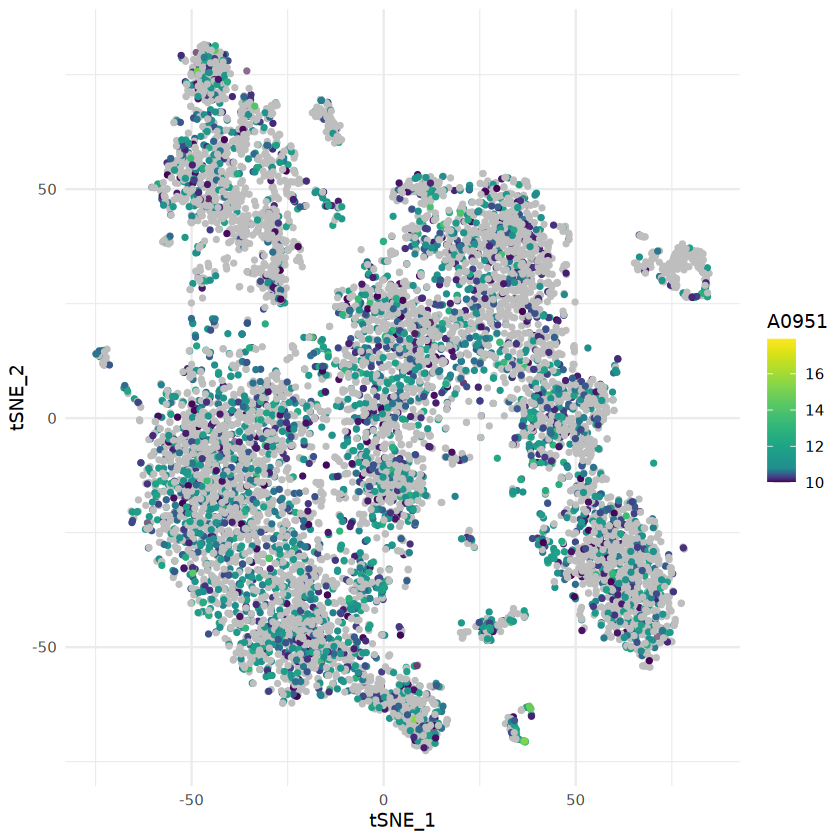

In [8]:
library(ggplot2)

# 读取数据
data <- read.table("Cai-25-2-22-PRO/03.count_cite/Cai-25-2-22-PRO_tsne_coord.tsv", header = TRUE, sep = "\t")

# 设置颜色：低于10为灰色，高于10使用 Jet 色盘
data$color_group <- ifelse(data$A0951 < 10, NA, data$A0951)

ggplot(data, aes(x = tSNE_1, y = tSNE_2, color = color_group)) +
  geom_point(size = 1) +
  scale_color_gradientn(
    colors = c("gray", viridis::viridis(100)),
    values = c(0, 0.1, 1),  # Adjust the scale for the gray and viridis range
    na.value = "gray"  # Points with NA will be colored gray
  ) +
  labs(x = "tSNE_1", y = "tSNE_2", color = "A0951") +
  theme_minimal()

# 保存图片
# ggsave("tsne_plot.png", width = 6, height = 4, dpi = 300)



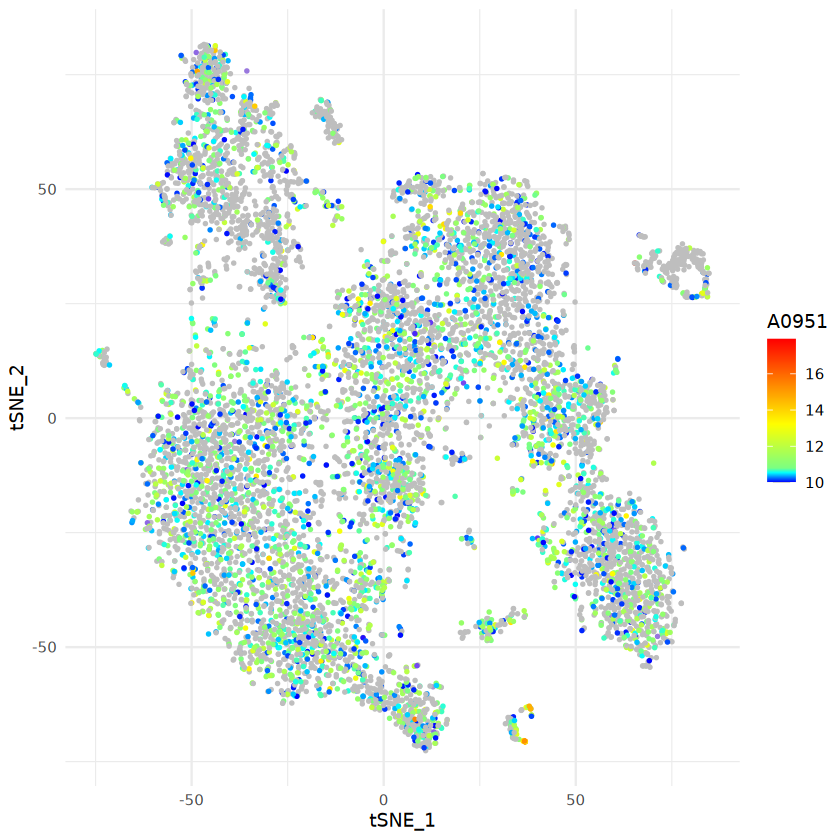

In [12]:
library(ggplot2)

# 读取数据
data <- read.table("Cai-25-2-22-PRO/03.count_cite/Cai-25-2-22-PRO_tsne_coord.tsv", header = TRUE, sep = "\t")

# 设置颜色：低于10为灰色，高于10使用 Jet 色盘
data$color_group <- ifelse(data$A0951 < 10, NA, data$A0951)

# 定义 Jet 颜色映射
jet_colors <- grDevices::colorRampPalette(c("blue", "cyan", "yellow", "red"))(100)

ggplot(data, aes(x = tSNE_1, y = tSNE_2, color = color_group)) +
  geom_point(size = 0.5) +
  scale_color_gradientn(
    colors = c("gray", jet_colors),
    values = c(0, 0.1, 1),  # 设置灰色和 jet 颜色之间的值映射
    na.value = "gray"  # 对于 NA 值使用灰色
  ) +
  labs(x = "tSNE_1", y = "tSNE_2", color = "A0951") +
  theme_minimal()

# 保存图片
ggsave("tsne_plot.png", width = 6, height = 4, dpi = 300)
